In [9]:
from matplotlib import pylab as plt
from astropy.io import fits
import numpy as np
import os, glob
import lsst.daf.persistence as dp
import lsst.afw.display as display
import lsst.afw.display.rgb as rgb
import lsst.geom as geom
from astropy.table import Table
from astropy.io import fits
import h5py
import pandas as pd

In [2]:
inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/raw_amico_cats/DC2_v0_yband/masks/output/MASK/"

raw = fits.open(inpath + "3830_mask_binary.fits")
buff = fits.open(inpath + "3830_mask_binary_buffer.fits")

In [3]:
repo = "/sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/rerun/run2.2i-coadd-wfd-dr6-v1"
butler = dp.Butler(repo)

/tmp/ipykernel_1885/983700186.py:2: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dp.Butler(repo)
/tmp/ipykernel_1885/983700186.py:2: FutureWarning: Gen2 Butler has been deprecated (ImsimMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dp.Butler(repo)


CameraMapper INFO: Loading exposure registry from /sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/registry.sqlite3
CameraMapper INFO: Loading calib registry from /sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading calib registry from /sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading calib registry from /sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/CALIB/calibRegistry.sqlite3
LsstCamMapper WARN: Unable to find valid calib root directory
CameraMapper INFO: Loading calib registry from /sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading exposure registry from /sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/registry.sqlite3
CameraMapper INFO: Loading calib registry from /sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading calib registry from /sps/lsst/dataproducts/de

In [5]:
skyMap = butler.get("deepCoadd_skyMap")
tractInfo = skyMap[3830]
wcs = tractInfo.getWcs()
bbox = tractInfo.getBBox()

In [6]:
print(wcs, "\n", bbox)

FITS standard SkyWcs:
Sky Origin: (60.3045685279, -36.4462809917)
Pixel Origin: (13999, 13999)
Pixel Scale: 0.2 arcsec/pixel 
 (minimum=(0, 0), maximum=(27999, 27999))


In [7]:
dc2_ra_min = 60.3045685279-((13999*0.2)/3600)
dc2_ra_max = 60.3045685279+((13999*0.2)/3600)
dc2_dec_min = -36.4462809917-((13999*0.2)/3600)
dc2_dec_max = -36.4462809917+((13999*0.2)/3600)

In [8]:
gal = Table.read("/sps/lsst/users/tguillem/web/clusters/catalogs/DC2_photoz_flexzboost/v0/3830/galaxies.fits")

In [4]:
#def get_all(name):
#    print(name)

In [5]:
#f1 = h5py.File(f'/sps/lsst/groups/desc/PZ/PhotoZDC2/run2.2i_dr6_v2/CATALOGS_W_TRUTH/Run2.2i_dr6_dereddened_tract_3830_withtruez.hdf5', 'r')
#f1.visit(get_all)
#print(f1.attrs.keys())

photometry
photometry/blendedness
photometry/dec
photometry/ebv
photometry/extendedness
photometry/id
photometry/is_truth_match_good
photometry/is_truth_match_unique
photometry/mag_err_g_lsst
photometry/mag_err_i_lsst
photometry/mag_err_r_lsst
photometry/mag_err_u_lsst
photometry/mag_err_y_lsst
photometry/mag_err_z_lsst
photometry/mag_g_lsst
photometry/mag_i_lsst
photometry/mag_r_lsst
photometry/mag_u_lsst
photometry/mag_y_lsst
photometry/mag_z_lsst
photometry/ra
photometry/redshift
photometry/true_mag_r


In [24]:
#f1_ra = f1['photometry/ra']
#f1_dec = f1['photometry/dec']
#print(max(f1_ra)-min(f1_ra), max(f1_dec)-min(f1_dec)) #Normally box size must be 1.6 for each side

1.8274073438168088 1.487602730235288


In [14]:
dirDpdd =  '/sps/lsst/groups/desc/shared/DC2-prod/Run2.2i/dpdd/Run2.2i-dr6/object_dpdd_only/'
fileDpdd = dirDpdd +  f"object_dpdd_tract{str(3830)}.parquet"
#columns = ["objectId", "clean", "good", "extendedness"]
f3 = pd.read_parquet(fileDpdd, engine='pyarrow')

In [15]:
#plt.scatter(f3['ra'], f3['dec'])

In [16]:
f3_gals = f3[(f3["clean"]==True) & (f3["extendedness"]>.5)]

In [17]:
f3_ra = f3_gals['ra']
f3_dec = f3_gals['dec']

In [18]:
#print(max(f3_ra)-min(f3_ra), max(f3_dec)-min(f3_dec))

In [19]:
ra_min, ra_max, step1 = raw[0].header["START_1"], raw[0].header["END_1"], raw[0].header["STEP_1"]
n_bin1 = int((ra_max-ra_min)/step1)
dec_min, dec_max, step2 = raw[0].header["START_2"], raw[0].header["END_2"], raw[0].header["STEP_2"]
n_bin2 = int((dec_max-dec_min)/step2)
ra = np.linspace(ra_min, ra_max, n_bin1)
dec =  np.linspace(dec_min, dec_max, n_bin2)
ra_m, dec_m = np.meshgrid(ra, dec)

In [20]:
dc2_ra = np.linspace(dc2_ra_min, dc2_ra_max, 2)
dc2_dec = np.linspace(dc2_dec_min, dc2_dec_max, 2)
dc2_ra2 = np.linspace(dc2_ra_min+(1/60), dc2_ra_max-(1/60), 2)
dc2_dec2 = np.linspace(dc2_dec_min+(1/60), dc2_dec_max-(1/60), 2)

In [25]:
dc2_ra_m, dc2_dec_m = np.meshgrid(dc2_ra, dc2_dec)
dc2_ra_m2, dc2_dec_m2 = np.meshgrid(dc2_ra2, dc2_dec2) #rescale considering inner_box

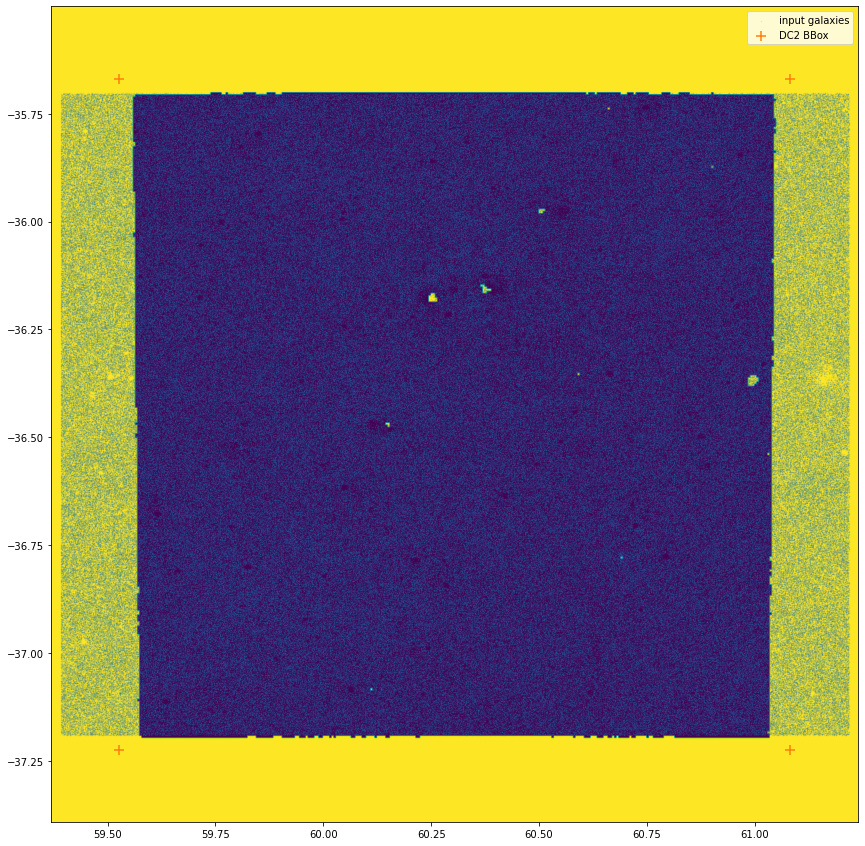

In [27]:
plt.figure(figsize=(15,15))
plt.imshow(raw[0].data, extent = [ra_min, ra_max, dec_max, dec_min])
plt.scatter(gal['ra'], gal["dec"],s=.1, alpha = .2, label = 'input galaxies')
plt.scatter(dc2_ra_m, dc2_dec_m, marker = '+', s=100, label = 'DC2 BBox')
#plt.scatter(dc2_ra_m2, dc2_dec_m2, marker = '+', s=100, label = 'DC2 reduced')
plt.xlim([ra_min, ra_max])
plt.ylim([dec_min, dec_max])
plt.legend()

## Masks with buffer

In [28]:
ra_min, ra_max, step1 = buff[0].header["START_1"], buff[0].header["END_1"], buff[0].header["STEP_1"]
n_bin1 = int((ra_max-ra_min)/step1)
dec_min, dec_max, step2 = buff[0].header["START_2"], buff[0].header["END_2"], buff[0].header["STEP_2"]
n_bin2 = int((dec_max-dec_min)/step2)
ra = np.linspace(ra_min, ra_max, n_bin1)
dec =  np.linspace(dec_min, dec_max, n_bin2)
ra_m, dec_m = np.meshgrid(ra, dec)

(-37.3912812721422, -35.5012812721422)

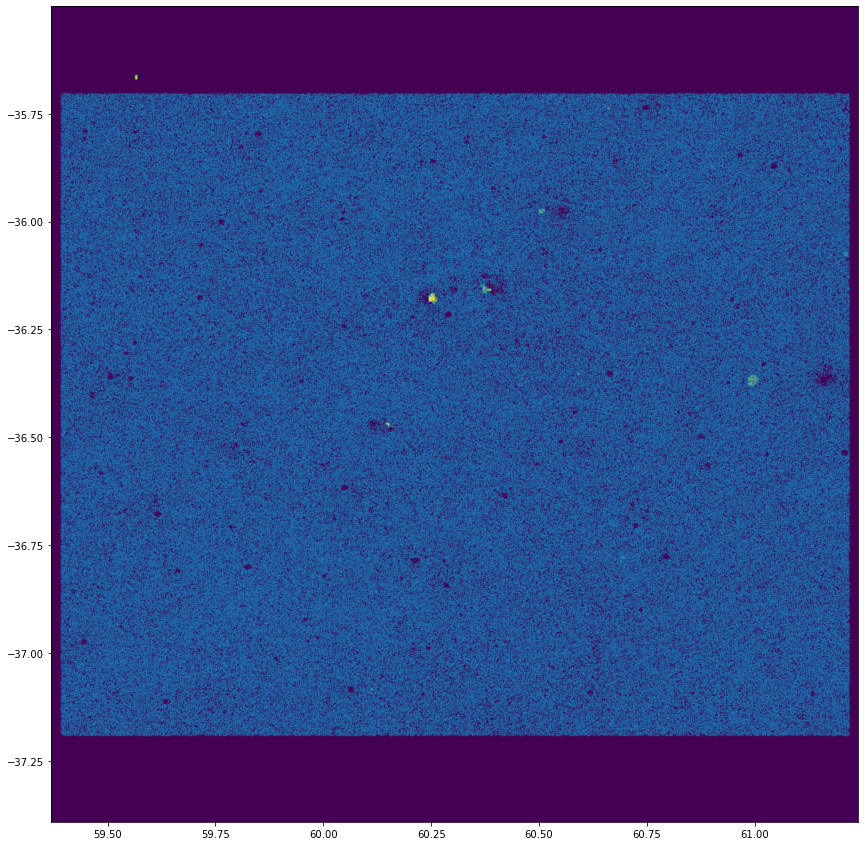

In [29]:
plt.figure(figsize=(15,15))
plt.scatter(gal['ra'], gal["dec"],s=1, alpha = .2)
plt.imshow(buff[0].data, extent = [ra_min, ra_max, dec_max, dec_min])
plt.xlim([ra_min, ra_max])
plt.ylim([dec_min, dec_max])

(-36.25, -36.0)

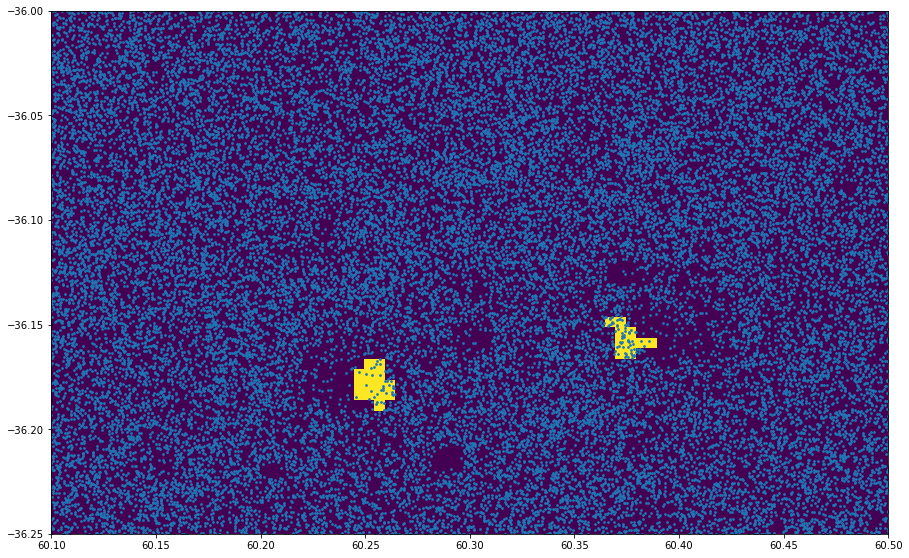

In [30]:
plt.figure(figsize=(15,15))
plt.scatter(gal['ra'], gal["dec"],s=3, alpha = 1)
plt.imshow(buff[0].data, extent = [ra_min, ra_max, dec_max, dec_min])
plt.xlim([60.1,60.50])
plt.ylim([-36.25,-36])

(-36.5, -36.25)

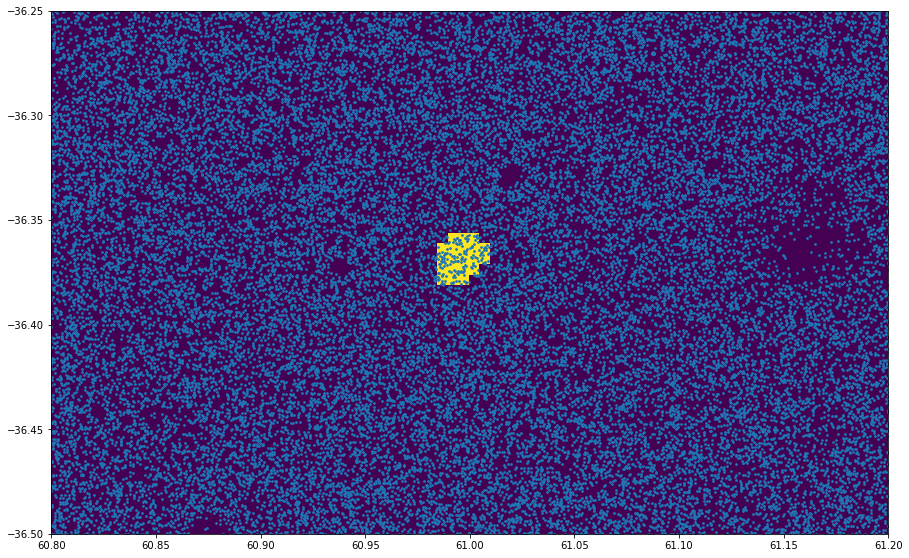

In [31]:
plt.figure(figsize=(15,15))
plt.scatter(gal['ra'], gal["dec"],s=3, alpha = 1)
plt.imshow(buff[0].data, extent = [ra_min, ra_max, dec_max, dec_min])
plt.xlim([60.8,61.2])
plt.ylim([-36.5,-36.25])